In [1]:
import numpy as np
import random
import time
import math
import tqdm
import matplotlib.pyplot as plt



In [2]:
# Load the cities into an array
cities_file = open("cities.txt", "r")
cities = [] # List that will hold the cities
for line in cities_file:
    city = line.strip('\n')
    cities.append(city)

cities_file.close()

In [3]:
# Storing the cities in a graph for speedy traversal
class Graph:
    def __init__(self, cities_file_name: str, distances_file_name: str):
        self.graph = {}
        distances_file = open(distances_file_name, "r")
        i = 0
        for line in distances_file:
            line = line.strip('\n').split(',')
            distances = []
            for j in range( len(line) ):
                distances.append((cities[j], float(line[j]) ))
            self.graph[ cities[i] ] = distances
            i += 1

    def print(self):
        for i in self.graph:
            print(i, ':', self.graph[i])

    def get_distance(self, start: str, end: str):
        if start not in self.graph:
            return None
        if end not in  self.graph:
            return None
        for edge in self.graph[start]:
            if edge[0] == end:
                return edge[1]
    
        
g = Graph("cities.txt", "distances.csv")


In [4]:

# In place shuffle
def shuffle(array, iterations):
    for i in range(iterations):
        np.random.shuffle(array)
# Calculate fitness - used in both task 2.1 & 2.2
def calc_fitness(route):
    distance = 0
    for i in range( len(route) - 1 ):
        distance += g.get_distance(route[i], route[i +1])

    return distance

def pretty_print_route(route):
    print(" => ".join(route))



# Task 2.1 Generation of random solutions

In [5]:
def create_random_solution(print_route=False):
    shuffled = cities.copy() 
    shuffle(shuffled, 1000)
    if print_route:
        pretty_print_route(shuffled)
    return shuffled
distance = calc_fitness(create_random_solution(print_route=True))
print(distance)

Swansea => Birmingham => Brighton => Bristol => Plymouth => Newcastle => London => Leeds => Edinburgh => Liverpool => Inverness => Bangor => Southampton => Norwich => Manchester => Cambridge => Oxford => Cardiff => Glasgow => Aberdeen
4409.0


In [6]:
def swap(route):
    new_route = route.copy()
    a_idx = random.randint(0, len(new_route) - 1)
    b_idx = a_idx
    # While the random index to swap doesn't match, create a new one
    # Very un-likely that they will be the same after a random number, but just in case
    while a_idx == b_idx:
        b_idx = random.randint(0, len(new_route) - 1)
    new_route[a_idx], new_route[b_idx] = new_route[b_idx], new_route[a_idx]
    return new_route

# Discard perameter, it'll be passed from the optimiser but won't be used
def ruin_and_recreate(_):
    return create_random_solution()

route = create_random_solution()
print("Before swap: ")
pretty_print_route(route)
new_route = swap(route)
print("After swap: ")
pretty_print_route(new_route)

Before swap: 
Newcastle => Leeds => Glasgow => Southampton => Cardiff => Oxford => Norwich => Liverpool => Swansea => Bangor => London => Edinburgh => Aberdeen => Cambridge => Birmingham => Bristol => Plymouth => Manchester => Inverness => Brighton
After swap: 
Newcastle => Leeds => Glasgow => Southampton => Cardiff => Oxford => Norwich => Liverpool => Swansea => Bangor => London => Edinburgh => Aberdeen => Cambridge => Birmingham => Bristol => Plymouth => Manchester => Brighton => Inverness


In [7]:
ITERATIONS = 5000

class TravelingSalesPerson:
    def __init__(self, mutation):
        self.best_route = create_random_solution() # Start with a random solution
        self.mutation = mutation
        self.fitnessess = []
        self.iterations_since_last_swap = 0
        self.archive = []
        for _ in tqdm.tqdm( range( ITERATIONS ) ):
            if self.iterations_since_last_swap > 100:
                break
            self.iterate()

    def iterate(self):
        parent = self.best_route.copy()
        child = self.mutation(parent)

        parent_fitness = calc_fitness(parent)
        child_fitness = calc_fitness(child)

        if child_fitness < parent_fitness:
            self.best_route = child
            self.fitnessess.append(child_fitness)
            self.iterations_since_last_swap = 0
            self.archive.append((child, child_fitness))
        else:
            self.fitnessess.append(parent_fitness)
            self.iterations_since_last_swap += 1


    def show_graph(self):
        plt.style.use("fivethirtyeight")
        plt.title(f"Traveling Sales Person - {self.mutation.__name__}")
        plt.ylabel("Fitness - Total Distance\n( Lower is better )")
        plt.xlabel("Iteration")
        plt.plot(self.fitnessess)
        plt.show()


 15%|█▍        | 731/5000 [00:00<00:00, 24706.97it/s]


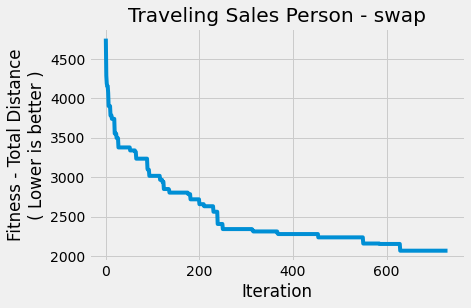

In [8]:
TravelingSalesPerson(swap).show_graph()

  4%|▍         | 223/5000 [00:00<00:03, 1368.33it/s]


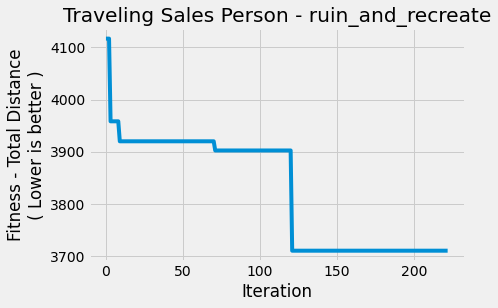

In [9]:
TravelingSalesPerson(ruin_and_recreate).show_graph()